# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
import random
import matplotlib.pyplot as plt
import gensim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import tensorflow.keras as keras
import time

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
# i will do some exploratory data analysis in the code cells below

In [5]:
# let's get a preliminary look at this dataset
df.describe()

,Review,Positive Review
count,1973,1973
unique,1865,2
top,"I admit, I haven't finished this book. A frie...",False
freq,3,993


In [6]:
# there are 1865 unique reviews. does this mean there are duplicate reviews?
print(df['Review'].nunique())

duplicate_entries = df.duplicated(subset=['Review'], keep=False)
duplicate_rows = df[duplicate_entries]
print("Duplicate entries:")
print(duplicate_rows)
duplicate_rows.shape # 213 duplicates?

contains_target = duplicate_rows['Positive Review'].isin([True]).any()
print(contains_target)

count_pos_duplicates = (duplicate_rows['Positive Review'] == False).sum()
print('Positive Duplicates: ', count_pos_duplicates)

count_neg_duplicates = (duplicate_rows['Positive Review'] == True).sum()
print('Negative Duplicates: ', count_neg_duplicates)

# because there are way more duplicate negative reviews than positive, I believe that someone 
# preprocessed this dataset by upsampling, because there was likely way less negative reviews

# but let's remove the duplicates and see what happens
df = df.drop_duplicates(subset=['Review'], keep='first')

print("New DF stats: ")
df.describe()

1865
Duplicate entries:
                                                 Review  Positive Review
19    This book would not be helpful for children of...            False
22    Nothing in this book was usable for me.  Okay,...            False
23    ``People  say again and again that philosop...            False
37    I have yet to read a true Grisham thriller, bu...            False
41    This book is terribly organized.  I'm not sure...            False
...                                                 ...              ...
1922  Don't get me wrong, I really enjoy Neal Stephe...            False
1935  I thought this book would be great and was rea...            False
1946  ...if you're in the bathroom with time on your...            False
1962  Ripping off King, but with more sex, shallower...            False
1963  This book expounds endlessly on how best to li...            False

[213 rows x 2 columns]
True
Positive Duplicates:  211
Negative Duplicates:  2
New DF stats: 


,Review,Positive Review
count,1865,1865
unique,1865,2
top,"""When I first came to Iran, black clad women a...",True
freq,1,979


In [7]:
# 1. see if there are any missing values (there aren't)
blank_reviews = df[df['Review'].isnull() | (df['Review'] == '')]
if blank_reviews.empty:
    print("no blank reviews")
else:
    print("some blank reviews")

no blank reviews


In [8]:
# 2. split into positive and negative reviews and look at size
# create a bar plot comparing the sizes
# here are the positive reviews
positive_reviews = df[df['Positive Review'] == True]
positive_reviews.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
4,We have now entered a second time of deep conc...,True
10,When Tom returns W/ Huck & Jim from thier craz...,True


In [9]:
# and here are the negative reviews
negative_reviews = df[df['Positive Review'] == False]
negative_reviews.head()

,Review,Positive Review
3,The book contained more profanity than I expec...,False
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False


number of positive reviews:  979
number of negative reviews:  886


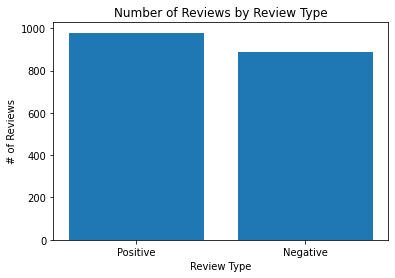

In [10]:
# let's look at the size of each new dataset (pos and neg reviews) to see if there's 
# any class imbalance

print("number of positive reviews: ", positive_reviews.shape[0]) #980 positive reviews
print("number of negative reviews: ", negative_reviews.shape[0]) #993 negative reviews, a pretty even split

# let's visualize this data to understand it better
review_type = ['Positive', 'Negative']
review_count = [positive_reviews.shape[0], negative_reviews.shape[0]]

plt.bar(review_type, review_count)
plt.xlabel('Review Type')
plt.ylabel('# of Reviews')
plt.title('Number of Reviews by Review Type')

plt.show()

# as we can see from this plot, the number of positive vs. negative reviews is very similar, but there are more positive reviews than negative
# there's about 100 more positive reviews that negative
# the difference is 52% to 48%, which is likely fine
# I don't think this is different enough to be a class imbalance, so I won't do any upsampling (we removed duplicates before)

In [11]:
# 3. see an example of a positive review and a negative review
print('Positive Review Example: ', '\n')
print(positive_reviews['Review'][0], '\n')

print('Negative Review Example: ', '\n')
print(negative_reviews['Review'][3], '\n')

Positive Review Example:  

This was perhaps the best of Johannes Steinhoff's books, since it does not  deal with his own stellar yet tragic WW II and post war career. The  insights of the average person living in Germany are of great importance to  both social and military historians alike. Steinhoff offered this  collective testament as a warning to all of us regarding war and the rise  of a dictator. As Johannes said in an interview, &quot;It is always the  civilians who suffer the most, yet are remembered the least.&quot
 

Negative Review Example:  

The book contained more profanity than I expected to read in a book by Rita Rudner.  I had expected more humor from a comedienne.  Too bad, because I really like her humor
 



In [12]:
# 4. create the word embeddings using the example from earlier in the course
# NOTE: the code for creating the word embeddings is based on "Transforming Text Using Word Embeddings" from Module 7.2

In [13]:
# create label and feature
X = df['Review'] # feature
y = df['Positive Review'] # label

print(X.head())
print(X.shape)

0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object
(1865,)


In [14]:
# use gensim package to preprocess text
X = X.apply(lambda row: gensim.utils.simple_preprocess(row))

X.head() # this shows the preprocessed reviews, where case is taken care of, punctuation, etc.

0    [this, was, perhaps, the, best, of, johannes, ...
1    [this, very, fascinating, book, is, story, wri...
2    [the, four, tales, in, this, collection, are, ...
3    [the, book, contained, more, profanity, than, ...
4    [we, have, now, entered, second, time, of, dee...
Name: Review, dtype: object

In [15]:
# split into training and testing to train the Word2Vec model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=1234)

X_train.head()

158     [found, stale, recounting, of, very, well, kno...
1299    [if, you, saw, the, show, and, liked, it, enou...
234     [fresh, taste, of, italy, is, marvelous, resou...
1805    [if, you, re, in, the, bathroom, with, time, o...
1644    [this, is, another, piece, of, lowbrow, anti, ...
Name: Review, dtype: object

In [16]:
# train word2vec model using X_train
print("Begin")
word2vec_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

print("End")

Begin
End


In [17]:
print('length of Word2Vec model: ', len(word2vec_model.wv.key_to_index))

# we can see what words are similar to the word "good", which appears in the reviews at least twice
word2vec_model.wv.most_similar('good')
# observation: some words seem related (such as 'great'), but others seem less related (like 'but')

length of Word2Vec model:  10432


[('surprised', 0.9935562610626221),
 ('reading', 0.990471601486206),
 ('finish', 0.9904049634933472),
 ('easy', 0.9902430176734924),
 ('but', 0.990083634853363),
 ('definitely', 0.9893675446510315),
 ('ok', 0.9887110590934753),
 ('thing', 0.9883863925933838),
 ('glad', 0.9882795214653015),
 ('finished', 0.9878849983215332)]

In [18]:
# as done in Module 7.2, we can visualize what the word vectors look like for the first 25 words the word2vec model has vectors for

top25 = word2vec_model.wv.index_to_key[:25]
pd.DataFrame({w:word2vec_model.wv[w] for w in top25}).T.style.background_gradient(cmap='coolwarm').set_precision(2)

In [19]:
# here, we can see how the word2vec model translates words into numbers, something the computer can understand
# and how similar vectors may indicate similarities in meanings between words

# just to see how this works, we can look at similarities between some words that show up in the reviews

print('disappointed' in word2vec_model.wv.key_to_index)
print('happy' in word2vec_model.wv.key_to_index)
print('glad' in word2vec_model.wv.key_to_index)
print('person' in word2vec_model.wv.key_to_index)
print(word2vec_model.wv.similarity(w1='happy', w2='disappointed'))
print(word2vec_model.wv.similarity(w1='happy', w2='glad'))
print(word2vec_model.wv.similarity(w1='book', w2='person'))

True
True
True
True
0.9360045
0.9729469
0.7940835


In [20]:
# before we transform the feature sets, let's take a look a quick look at them

# training set before transformation
print(X_train.shape)
X_train.head()

(1678,)


158     [found, stale, recounting, of, very, well, kno...
1299    [if, you, saw, the, show, and, liked, it, enou...
234     [fresh, taste, of, italy, is, marvelous, resou...
1805    [if, you, re, in, the, bathroom, with, time, o...
1644    [this, is, another, piece, of, lowbrow, anti, ...
Name: Review, dtype: object

In [21]:
# testing set before transformation
print(X_test.shape)
X_test.head()

(187,)


268    [was, really, looking, forward, to, reading, t...
807    [mark, liberman, and, geoffrey, pullum, could,...
224    [tried, really, did, but, couldn, get, beyond,...
222    [this, is, the, best, invertebrate, zoology, t...
942    [mark, sirower, thought, provoking, and, compl...
Name: Review, dtype: object

In [22]:
# transform training and test sets based on Word2Vec model
words = set(word2vec_model.wv.index_to_key)
#print(words)

print('Begin transforming X_train')
X_train_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_train], dtype=object)
print('Finish transforming X_train')

print('Begin transforming X_test')
X_test_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_test], dtype=object)
print('Finish transforming X_test')

Begin transforming X_train
Finish transforming X_train
Begin transforming X_test
Finish transforming X_test


In [23]:
print(X_train_word_embeddings.shape)
print(X_test_word_embeddings.shape)

print(X_train_word_embeddings[0].shape)
print(X_train_word_embeddings[1].shape)

print(X_train_word_embeddings[0]) # this is a matrix of 73 x 150

# get average word length
# that can be max word length


(1678,)
(187,)
(73, 100)
(28, 100)
[[-1.07695185e-01  4.63156015e-01  7.38903284e-02 ... -4.47368711e-01
   8.41803476e-02 -5.07673249e-02]
 [-4.17362750e-02  3.06234360e-01  2.91892458e-02 ... -2.72139937e-01
   4.67923321e-02 -3.11128777e-02]
 [-7.26850480e-02  9.13852692e-01 -4.34345186e-01 ... -5.83746076e-01
  -1.15810491e-01 -2.82850623e-01]
 ...
 [-5.39788269e-02  3.19729030e-01  5.72774783e-02 ... -2.59752601e-01
   3.78109664e-02 -3.47701237e-02]
 [ 3.84899671e-03  1.64489001e-02 -4.57491202e-04 ... -7.94239063e-03
   1.61869032e-03 -3.55648994e-03]
 [-1.27204567e-01  9.97910023e-01  3.25785428e-01 ... -7.98465431e-01
   3.20663750e-01 -1.96361661e-01]]


In [24]:
# check some basic stats to make sure everything looks right
# for example, number of words in first training example is 87. this is reasonable as in module 7.2, there are similar number of word values

print('Number of words in first training example: {0}'.format(len(X_train.iloc[0])))
print('Number of words in another training example: {0}'.format(len(X_train.iloc[13]))) #291
print('First word in first training example: {0}'.format(X_train.iloc[0][0]))
print('Second word in first training example: {0}\n'.format(X_train.iloc[0][1]))

print('Number of word vectors in first training example: {0}'.format(len(X_train_word_embeddings[0])))
print('First word vector in first training example:\n {0}'.format(X_train_word_embeddings[0][0]))
print('\nSecond word vector in first training example: \n {0}\n'.format(X_train_word_embeddings[0][1]))

Number of words in first training example: 105
Number of words in another training example: 207
First word in first training example: found
Second word in first training example: stale

Number of word vectors in first training example: 73
First word vector in first training example:
 [-0.10769518  0.463156    0.07389033  0.07515043  0.02031608 -0.84485453
  0.22572808  1.201918   -0.44646183 -0.51540345 -0.23065034 -0.5949255
 -0.02766171  0.29466748  0.0485638  -0.2293151   0.12482347 -0.33963242
 -0.25386885 -0.91915476  0.4246542  -0.13189346  0.3753713  -0.20113812
  0.02150441 -0.00453479 -0.17555077  0.01247365 -0.3619343   0.22444561
  0.45141023 -0.00432515  0.182855   -0.5472787  -0.1476449   0.6536535
  0.35104308 -0.4005182  -0.25176576 -0.53869444  0.00563019 -0.5282729
 -0.21536045 -0.07802751  0.28842944 -0.1134206  -0.31212476 -0.05401989
  0.19512448  0.45060763  0.34164327 -0.33933452 -0.25045145 -0.11769691
 -0.1843755   0.22361243  0.11169755  0.06953959 -0.5912169  

In [25]:
# as we can see earlier, the number of words in each training example can vary
# this will cause an error when training the neural network
# so, we can make all the vectors the same length by taking an element-wise average of the word embeddings

# this is converting the matrix into a 1d vector, so it's getting rid of a lot of information
# instead you can truncate instead of taking the mean
# so for example, you can take the first 50 vectors
# more about this in analysis at the end

# for now,
# what this is doing is for each review, there is a varying number of words
# and for each word, there's a vector of length 100
# this flattens the code from a matrix of (word_number, 100) to a vector of 100 for each review
# by taking the mean of the matrix by column --> 1d vector

X_train_feature_vector = []
for w in X_train_word_embeddings:
    #print(w.size)
    #print(w.shape)
    if w.size: # w.size is the size of the matrix
        X_train_feature_vector.append(w.mean(axis=0)) # this takes the mean of the vector by index
    else: # this is never really called
        print(w.size)
        X_train_feature_vector.append(np.zeros(100, dtype=float))
        
#print(X_train_feature_vector[0])
#print(len(X_train_feature_vector[0]))
#print(len(X_train_feature_vector))
        
X_test_feature_vector = []
for w in X_test_word_embeddings:
    if w.size:
        X_test_feature_vector.append(w.mean(axis=0))
    else:
        X_test_feature_vector.append(np.zeros(100, dtype=float))
        

In [26]:
# check that they're vectors of size 100. they seem to be!

for w in range(0, 5):
    print('Length of training example {0}: {1}'.format(w, len(X_train_feature_vector[w])))
    
print('First training example\'s feature vector: \n{0}'.format(X_train_feature_vector[0]))

Length of training example 0: 100
Length of training example 1: 100
Length of training example 2: 100
Length of training example 3: 100
Length of training example 4: 100
First training example's feature vector: 
[-0.04718553  0.4432685   0.01450507  0.06354601  0.03721881 -0.8049238
  0.170782    1.1364889  -0.40832156 -0.46821374 -0.15891716 -0.59255826
  0.01720768  0.30215967  0.06572971 -0.20020597  0.15256448 -0.31197965
 -0.28363365 -0.9087463   0.3555242  -0.07063047  0.34877685 -0.19730002
 -0.07383247  0.02580257 -0.16156626 -0.01564006 -0.38981122  0.16371939
  0.45210344 -0.02100007  0.1953659  -0.49354157 -0.17269962  0.6156334
  0.27039707 -0.43269596 -0.26994854 -0.5107218   0.05486566 -0.50110155
 -0.19024791 -0.08832112  0.35494974 -0.03830509 -0.31472766 -0.11619467
  0.17000024  0.406902    0.29604098 -0.38177717 -0.23358972 -0.12089816
 -0.14749923  0.18860765  0.08786719  0.07216418 -0.52250725  0.10043666
  0.28779992  0.00717014  0.32326406 -0.07902985 -0.3781892 

In [27]:
# now that our training and test sets have been transformed using word embeddings, we can create the neural network model to start making predictions

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [28]:
# YOUR CODE HERE

In [46]:
# I will be using keras to create the neural network model. Neural network models consist of
# an input layer, hidden layers, and an output layer

nn_model = keras.Sequential()

# the input layer needs an input shape to know the size of the input
# in this case, since each vector is of size 100
# so the input shape is 100,

input_layer = keras.layers.InputLayer(input_shape=(100,)) # this shape would have to change to something like (50, 150)
nn_model.add(input_layer)

# create the hidden layers
# note I am doing 3, as done in the Lab 7 assignment example for the other NN model

hidden_layer_1 = keras.layers.Dense(units=256, activation='relu')
nn_model.add(hidden_layer_1)

hidden_layer_2 =  keras.layers.Dense(units=128, activation='relu')
nn_model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_3)

hidden_layer_4 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_4)

#hidden_layer_5 = keras.layers.Dense(units=16, activation='relu')
#nn_model.add(hidden_layer_5)

# add output layer
output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)

# see what the model looks like
nn_model.summary()

# looks alright

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 69,121
Trainable params: 69,121
Non-trainable params: 0
__________________________________________________

In [47]:
# define the optimization function, to be used when compiling

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.05)

# define the loss function
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

In [48]:
# compile the NN model 
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

#X_train_feature_vector.shape

In [49]:
# callback class from Lab 7 that outputs info while model is training

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [33]:
type(X_train_feature_vector)
len(X_train_feature_vector)

1678

In [56]:
# FIT MODEL!

t0 = time.time() # start time

num_epochs = 100 #epochs

print(len(X_train_feature_vector))
print(len(X_train_feature_vector[0]))

history = nn_model.fit(np.array(X_train_feature_vector), y_train, epochs=num_epochs, verbose=0, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=50)], validation_split=0.2) # YOUR CODE HERE 

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

#Epoch [50/ 50], Loss: 0.6622, Accuracy: 0.6043, Val_loss: 0.6677, Val_accuracy: 0.5833
#Elapsed time: 4.27s

# 0.61 accuracy is highest i've gotten ... for training set , gave .56 for validation set
# .60 accuracy is highest i've gotten for test set accuracy

# epochs = 100 has yieleded the highest accuracy for train and validation so far
# 0.62

# .60 is better than .52, which would be if guessing everything to be a POSITIVE review

1678
100
Epoch [50/ 100], Loss: 0.6551, Accuracy: 0.6222, Val_loss: 0.6737, Val_accuracy: 0.5833
Epoch [100/ 100], Loss: 0.6538, Accuracy: 0.6215, Val_loss: 0.6650, Val_accuracy: 0.6131
Elapsed time: 12.21s


In [35]:
# TUNING THE HYPERPARAMETERS

# without tweaking anything, the model has an accuracy score of .6
# that's very middle of the line, very OKAY

# first i'm going to try to not remove duplicates
# this did not improve accuracy

# added another hidden layer and changed the units to start from 256
# this did not seem to improve accuracy

# changed learning rate to 0.08 instead of 0.1
# changed learning rate to 0.05

# changed epochs from 50 to 100 to 200. 100 yielded the best results for validation and train accuracy
# loss is not bad for both, at 0.63

# i didn't end up adding any dropout layers because 1. there wasn't an overfitting problem for training and validation scores are similar
# 2. it didn't improve performance in training or validation, or test data later

# there is however, an overfitting issue with the test data, which we'll see later

# final hyperparams, stabalizing the accuracy at around 0.60
# epochs: 100
# learning rate: 0.05
# 4 layers

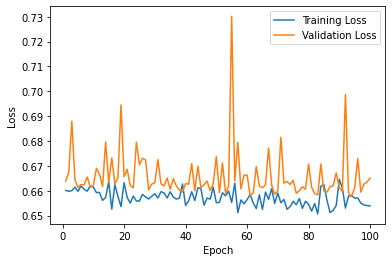

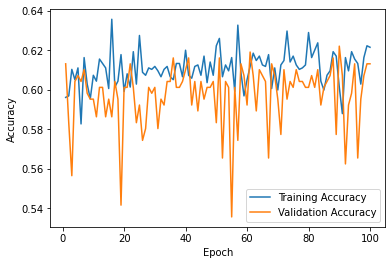

In [57]:
# add graphs!!!
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# training accuracy is higher than validation accuracy, caused by overfitting

# from these graphs, we can see that accuracy improves and loss decreases overtime
# we can also see that there isn't really any overfitting. accuracy and loss both end up
# at AROUND the same points on the graph

In [59]:
# now, let's calculate the model's performance on the test data
loss, accuracy = nn_model.evaluate(np.array(X_test_feature_vector), y_test) # YOUR CODE HERE

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

# okay, the model performs pretty poorly
# Loss:  0.6919130682945251 Accuracy:  0.5508021116256714
# this is a case of overfitting then
# as for hyper parameter tuning, there's not much more tuning to be done for the NN model
# i believe the problem is caused by the fact that the data is too flattened
# which will be discussed soon in analysis

6/6 [==============================] - 0s 5ms/step - loss: 0.7003 - accuracy: 0.5455
Loss:  0.7003288269042969 Accuracy:  0.5454545617103577


In [60]:
probability_predictions = nn_model.predict(np.array(X_test_feature_vector))

print("Predictions for the first 10 examples:")
print("Probability\t\t\tClass")
for i in range(0,10):
    if probability_predictions[i] >= .5:
        class_pred = "Good Review"
    else:
        class_pred = "Bad Review"
    print(str(probability_predictions[i]) + "\t\t\t" + str(class_pred))
    
# probabilities are generally close to 50%, especially for the bad reviews

Predictions for the first 10 examples:
Probability			Class
[0.44386417]			Bad Review
[0.62717116]			Good Review
[0.42792177]			Bad Review
[0.7592336]			Good Review
[0.75730944]			Good Review
[0.58466446]			Good Review
[0.53164136]			Good Review
[0.70290416]			Good Review
[0.42587417]			Bad Review
[0.75741327]			Good Review


In [61]:
print('Review #1:\n')
print(X_test.to_numpy()[56])

goodReview = True if probability_predictions[56] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))

Review #1:

['this', 'was', 'required', 'text', 'for', 'one', 'of', 'my', 'graduate', 'courses', 'and', 'didn', 'expect', 'to', 'enjoy', 'it', 'much', 'it', 'wasn', 'far', 'into', 'the', 'book', 'that', 'began', 'to', 'resonate', 'with', 'some', 'of', 'the', 'struggles', 'for', 'racial', 'harmony', 'articulated', 'by', 'perkins', 'and', 'rice', 'in', 'chapter', 'spencer', 'perkins', 'states', 'emphatically', 'the', 'civil', 'rights', 'movement', 'has', 'run', 'its', 'course', 'and', 'we', 've', 'gotten', 'just', 'about', 'all', 'you', 'can', 'expect', 'to', 'get', 'from', 'political', 'movement', 'white', 'guy', 'took', 'offense', 'at', 'the', 'thought', 'that', 'someone', 'would', 'declare', 'the', 'struggle', 'for', 'civil', 'rights', 'obsolete', 'his', 'point', 'is', 'well', 'made', 'through', 'the', 'development', 'of', 'this', 'and', 'subsequent', 'chapters', 'the', 'move', 'toward', 'reconciliation', 'must', 'move', 'from', 'race', 'to', 'grace', 'regardless', 'of', 'your', 'reli

In [83]:
print('Review #2:\n')
print(X_test.to_numpy()[0])

goodReview = True if probability_predictions[0] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[0]))

print('Probability it was a good review: ', probability_predictions[0])

Review #2:

['was', 'really', 'looking', 'forward', 'to', 'reading', 'this', 'book', 'since', 'am', 'both', 'brain', 'researcher', 'and', 'professional', 'musician', 'first', 'it', 'was', 'highly', 'disorganized', 'and', 'rambled', 'from', 'subject', 'to', 'subject', 'without', 'any', 'real', 'framework', 'much', 'of', 'what', 'the', 'author', 'spoke', 'of', 'was', 'not', 'related', 'to', 'how', 'the', 'brain', 'processes', 'music', 'but', 'speaks', 'to', 'the', 'way', 'research', 'is', 'conducted', 'even', 'this', 'was', 'sparse', 'at', 'best', 'he', 'attempted', 'to', 'explain', 'the', 'elements', 'of', 'music', 'so', 'that', 'the', 'majority', 'of', 'people', 'could', 'understand', 'it', 'however', 'it', 'became', 'too', 'watered', 'down', 'and', 'even', 'lost', 'me', 'lastly', 'the', 'author', 'was', 'entirely', 'too', 'self', 'congradulatory', 'as', 'to', 'his', 'own', 'accomplishments', 'pushing', 'the', 'envelope', 'of', 'science', 'should', 'be', 'award', 'enough', 'for', 'thes

In [ ]:
# ANALYSIS

# in this brief analysis, I will discuss the overall performance of my model,
# and some further steps that can be taken to possibly improve my model

# Model Performance:
# With the training and validation set, the model performs with around %60 accuracy
# this is better than random guessing, which would yield 52% accuracy

# however, when we come to the test set, we have around 55% accuracy, which is very close to 52%
# this difference could be caused by a couple of issues
# overfitting is very likely, as the number of epochs is high
# however, I tried reducing the number of epochs and adding dropout layers, but this did not
# improve test accuracy

# I think the fundamental problem comes down to the fact that the data is flattened too much
# when normalizing it to vectors of 100, which I discussed with the TA Rebecca during an OH. 
# a lot of information is lost, and usually in this kind of problem using word embeddings,
# the NN model is trained on matrices

# so, I tried keeping the matrices, and changing the input shape to (67, 100)
# this means that every review would be truncated/extended to length 67, with 67 word vectors of
# length 100 each

# however... accuracy was worse, so I decided to keep the flattened data method instead,
# as it performs moderately on the training and validation data

# continuing to work on making the NN model handle the matrices would be interesting, 
# and I could see if accuracy can improve a lot more

In [84]:
# REFERENCES

# Lab 7 --> neural network model code
# Module 7.2 "Transforming Text Using Word Embeddings" --> word2vec model code
